## Vader starts with importing Pandas, Numpy, and NLTK - VADER Sentiment Analyzer

In [1]:
import pandas as pd
import numpy as np

import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


we take the Chatlog from the Chatlogs folder

In [2]:
documentName = 'chatriotgames101821'
folderName = '/ChatLogs/chatriotgames/'

Reading file with pandas to create a dataframe

In [3]:
data = pd.read_csv('..'+ folderName + documentName + 'Clean' + '.csv')
data.head()

,Date,Channel,Username,Message,Tag_owner,Cleanest_message
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 ...,0,slap LUL i
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,0,go
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,0,wif
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,0,win
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,0,Clap


Dropping Tag Owner as it is not needed for VADER

In [4]:
data.drop('Tag_owner', axis=1, inplace=True)
data.head()

,Date,Channel,Username,Message,Cleanest_message
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 ...,slap LUL i
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,go
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,wif
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,win
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,Clap


In [5]:
analyser = SentimentIntensityAnalyzer()



### Here we Enter the New_emotes list where we added to the Lexicon, these are emotes that are unique to only Twitch and its 3rd party

In [6]:


new_emotes = {
    'omegalul': 2,
    'lilw': 0,
    'monkaw': -3.0,
    'waytoodank': 0,
    'ez': 2.0,
    'clap' : 3.0,
    'lul' : 2.0,
    'booba' : 1.0,
    'pepega' : -3.0,
    'feelsgoodman' : 3.0,
    'wutfac' : -3.0,
    'sadge' : -4.0,
    'kreygasm' : 3.0,
    'kappa' : 0,
    'peeposad' : -4.0,
    'pogu' : 4.0,
    'truening' : 0,
    'lulw' : 2.0,
    'feelsbadman' : -3.0,
    'pogchamp' : 3.0,
    'poggers' : 3.0,
    'heyguys' : 2.0,
    'pepehands': -2.0,
    'rip' : -2.0,
    'seemsgood' : 3.0,
    'notlikethis' : -2.0,
    'clap' : 2.0,
    'pog' : 2.0,
    'smorc' : 0,
    'dansgam' : -4.0,
    'ez' : -1.0,
    'peeposad' : -2.0,    
}

In [7]:
analyser.lexicon.update(new_emotes)

We enter Polarity scores to the new dataset

In [8]:
data['scores'] = data['Cleanest_message'].apply(lambda clean_message:analyser.polarity_scores(clean_message))

In [9]:
data.head(5)

,Date,Channel,Username,Message,Cleanest_message,scores
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 ...,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'comp..."
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


We calculate the total sentiment polarity scores split between Negative, Neutral, and Positive.

In [10]:
total=analyser.polarity_scores(data['Cleanest_message'])

In [11]:
total

{'neg': 0.138, 'neu': 0.706, 'pos': 0.155, 'compound': 0.9905}

#### This is a Sentiment pie chart that was created before we added the new_emotes to the VADER lexicon

C:\Users\flipi\.conda\envs\bootcamp\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  after removing the cwd from sys.path.


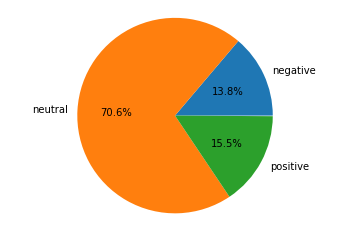

In [12]:
import matplotlib.pyplot as plt
labels = ['negative', 'neutral', 'positive']
sizes  = [total['neg'], total['neu'], total['pos']]
plt.pie(sizes, labels=labels, autopct='%1.1f%%') # autopct='%1.1f%%' gives you percentages printed in every slice.
plt.axis('equal')  # Ensures that pie is drawn as a circle.
plt.show()

In [13]:
pd.set_option('display.max_colwidth', 200)

We Bring up the Dataset that includes the score of the Messages of the Twitch Dataset

In [14]:
data.head()

,Date,Channel,Username,Message,Cleanest_message,scores
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 EU i kcuf your women and slap your men LUL <3,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.6523}"
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}"
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}"


We add a Compound Score column to the dataframe to get the actual Sentiment Score

In [15]:


data['comp_score'] = data['scores'].apply(lambda score_dict: score_dict['compound'])

In [16]:
data.head()

,Date,Channel,Username,Message,Cleanest_message,scores,comp_score
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 EU i kcuf your women and slap your men LUL <3,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.6523}",0.6523
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}",0.5859
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}",0.4588


In [17]:
dataCopy = data.copy()

We reformat the dates on the Date Column

In [18]:
dataCopy.reset_index().set_index('Date')
dataCopy['Date'] =  pd.to_datetime(dataCopy['Date'], format='%Y-%m-%d %H:%M:%S')
dataCopy = dataCopy.set_index('Date')

In [19]:
dataCopy.head()

,Channel,Username,Message,Cleanest_message,scores,comp_score
Date,,,,,,
2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 EU i kcuf your women and slap your men LUL <3,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.6523}",0.6523
2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}",0.5859
2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}",0.4588


### We make 4 different Datastes for the Time series Experiment of this project
These are all moving averages of the VADER data set of RiotGames Chat

First Dataset: Average Minute 

Second Dataset : Average 30 Second

Third Dataset: Average 10 Second

Fourth Dataset: Average per Second

In [20]:
dataAverageByMinute = dataCopy.groupby(pd.Grouper(freq='T')).mean()

In [21]:
dataAverageByMinute.to_csv('..'+ folderName + documentName + 'AverageMinute' + '.csv')

In [22]:
dataAverageBy30Second = dataCopy.groupby(pd.Grouper(freq='30S')).mean()

In [23]:
dataAverageBy30Second.to_csv('..'+ folderName + documentName + 'Average30Second' + '.csv')

In [24]:
dataAverageBy10Second = dataCopy.groupby(pd.Grouper(freq='10S')).mean()

In [25]:
dataAverageBy10Second.to_csv('..'+ folderName + documentName + 'Average10Second' + '.csv')

data['sentiment']=''

data.loc[data.comp_score>0,'sentiment']='POSITIVE'

data.loc[data.comp_score==0,'sentiment']='NEUTRAL'

data.loc[data.comp_score<0,'sentiment']='NEGATIVE'

In [27]:
def categorise_sentiment(sentiment, neg_threshold=-0.05, pos_threshold=0.05):
    """ categorise the sentiment value as positive (1), negative (-1) 
        or neutral (0) based on given thresholds """
    if sentiment < neg_threshold:
        label = 'negative'
    elif sentiment > pos_threshold:
        label = 'positive'
    else:
        label = 'neutral'
    return label

### We create a new Column with Sentiment to classify 

that if score is more than 0 it is Positive

if score is 0 it is Neutral

if score is less than 0 it is Negative 

In [50]:
data['sentiment'] = data['comp_score'].apply(categorise_sentiment)

In [51]:
data.head()

,Date,Channel,Username,Message,Tag_owner,Cleanest_message,scores,comp_score,sentiment
0,2021-10-18 17:18:04,riotgames,xoocboots,EU i kcuf your women and slap your men LUL <3 EU i kcuf your women and slap your men LUL <3,0,slap LUL i,"{'neg': 0.0, 'neu': 0.158, 'pos': 0.842, 'compound': 0.6523}",0.6523,positive
1,2021-10-18 17:18:10,riotgames,secsso23,2-4 GG,0,go,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,2021-10-18 17:18:10,riotgames,gracejacky,tl had no dmg wtf,0,wif,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
3,2021-10-18 17:18:10,riotgames,ritogames69420,Win 4 borfday,0,win,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}",0.5859,positive
4,2021-10-18 17:18:10,riotgames,tlev1n,LETS GO TL FeelsStrongMan Clap,0,Clap,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.4588}",0.4588,positive


#### This is a Sentiment bar plot that was created after we added the new_emotes to the VADER lexicon

<AxesSubplot:title={'center':'sentiment analysis'}>

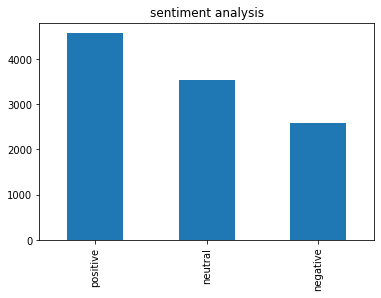

In [52]:
data.sentiment.value_counts().plot(kind='bar',title="sentiment analysis")

#### This is a Sentiment pie plot that was created after we added the new_emotes to the VADER lexicon

<AxesSubplot:ylabel='sentiment'>

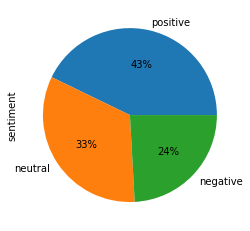

In [53]:
data.sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%')

In [24]:
data.to_csv ('..'+ folderName + documentName + 'Sentiment Analysis' + '.csv', index = False, header=True)

### This is a Frequency Histogram of the Sentiment of the Dataset

<AxesSubplot:ylabel='Frequency'>

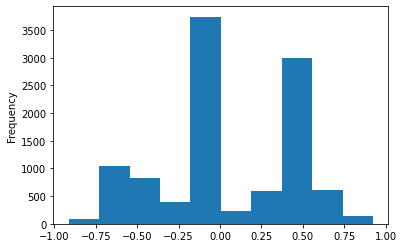

In [25]:
%matplotlib inline


data['comp_score'].plot(kind='hist')

## In this section we use TfidfVectorizer for experimental purposes

In [24]:
X=data['Cleanest_message']
y=data['sentiment']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Splitting Data

In [25]:
y.tail()

10675    positive
10676    negative
10677    negative
10678    negative
10679    positive
Name: sentiment, dtype: object

In [26]:
X.head()

0    slap LUL i
1            go
2           wif
3           win
4          Clap
Name: Cleanest_message, dtype: object

In [27]:
X_train.shape

(7155,)

In [28]:
y_test.shape

(3525,)

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(7155, 317)

Using TfidfVectorizer

In [30]:
#print(X_train_tfidf)

In [31]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

Also using Linear SVC for comparison purposes

In [32]:
from sklearn.pipeline import Pipeline


text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train) 

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

Only training set has been vectorized into a full vocabulary.
In order to perform an analysis on test set scikit-learn offers a Pipeline that behaves like a compound classifier

In [34]:
predictions = text_clf.predict(X_test)

In [35]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[ 832   24   14]
 [   4 1143    9]
 [   5   32 1462]]


These are the metrics from the predictions made

In [36]:
print(metrics.accuracy_score(y_test,predictions))

0.9750354609929078


This is the accuracy score

In [ ]:
myreview = "Booba Booba"

In [38]:
print(text_clf.predict([myreview]))

['positive']


https://www.koreascience.or.kr/article/JAKO202024758671657.pdf #why choose TFIDF vs WORD2VEC

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Importing WordCloud Library

In [27]:
wordcloud = WordCloud().generate(' '.join(data['Cleanest_message']))

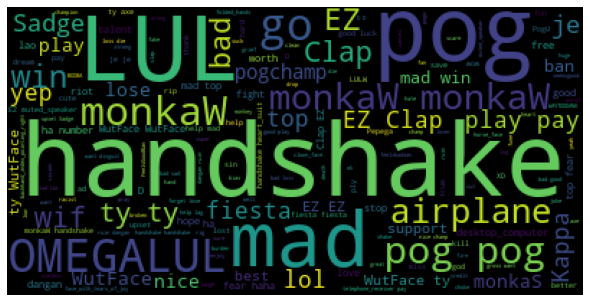

In [28]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

### WordCloudiis a Visualization tool to exhibit the most common phrases in the Dataset

<AxesSubplot:>

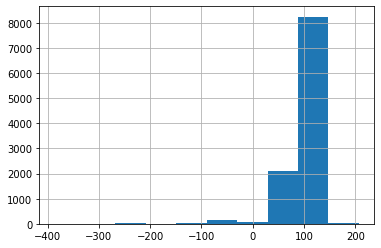

In [29]:
from textstat import flesch_reading_ease

data['Cleanest_message'].\
   apply(lambda x : flesch_reading_ease(x)).hist()

### Using Textstat library and import flesch_reading_ease

Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text
Almost all of the readability scores fall above 60